In [1]:
# import necessary packages

import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import linregress
import seaborn as sns

%matplotlib inline


In [2]:
fireData = pd.read_csv("Clean_Data/CA_WildFires.csv")
droughtData = pd.read_csv("Clean_Data/CA_Droughts.csv")

year_mean = droughtData.groupby('year').mean()
year_mean_df = pd.DataFrame(year_mean)
year_mean_df['year'] =year_mean_df.index

year_df = droughtData.groupby('year')['DSCI'].mean()
year_df =pd.DataFrame({'Average DSCI':year_df})
year_df['year']=year_df.index

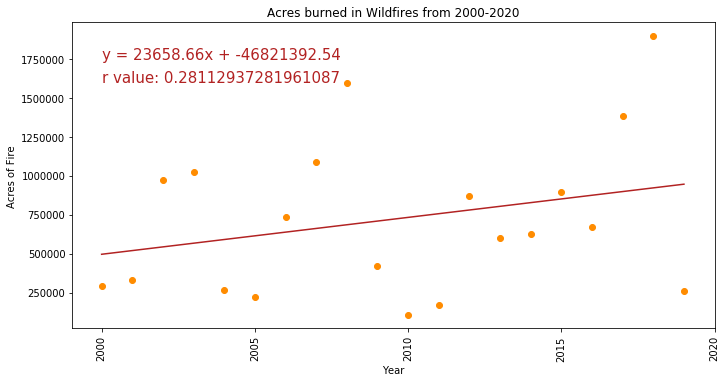

In [3]:
# create linear regression graph for Years vs Acres

x_values = fireData["Year"]
y_values = fireData["Acres"]
tick_locations = [2000, 2005, 2010, 2015, 2020]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(10,5))
plt.scatter(x_values,y_values, color="darkorange")
plt.plot(x_values,regress_values,color="firebrick")
plt.annotate(line_eq,(2000,1750000),fontsize=15,color="firebrick")
plt.annotate(f'r value: {rvalue}', (2000, 1600000),fontsize=15,color="firebrick")
plt.xticks(tick_locations, tick_locations, rotation="vertical")
plt.tight_layout()

plt.title("Acres burned in Wildfires from 2000-2020")
plt.xlabel("Year")
plt.ylabel("Acres of Fire")


plt.savefig("Images/FireAcresScatterPlot.png")
plt.show()

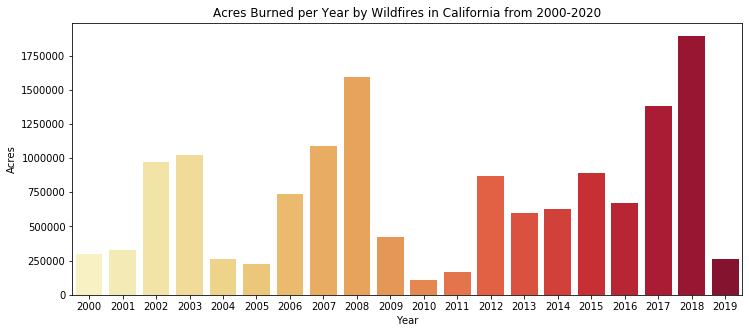

In [4]:
# seaborn bar chart for acres burned by year

plt.figure(figsize=(12,5))
plt.title("Acres Burned per Year by Wildfires in California from 2000-2020")
pal = sns.color_palette("YlOrRd",20)
ax = sns.barplot(x="Year", y="Acres", data=fireData, palette=pal)
plt.savefig("Images/AverageAcresBarChart.png")

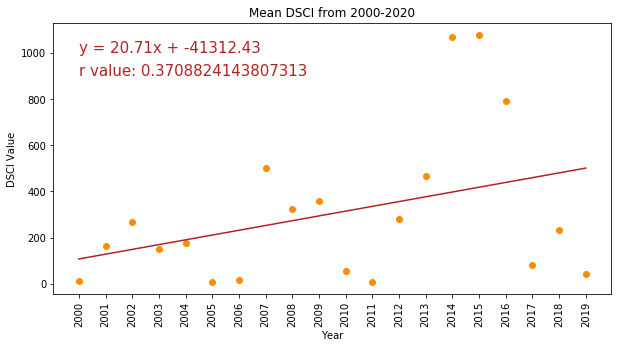

In [5]:
# Mean DSCI Scatterplot with Linear Regression
x_values = year_mean_df['year']
y_values = year_mean_df['DSCI']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,5))
plt.scatter(x_values,y_values, color="darkorange")

plt.plot(x_values,regress_values,"firebrick")
plt.annotate(line_eq,(2000,1000),fontsize=15,color="firebrick")
plt.annotate(f'r value: {rvalue}', (2000, 900), fontsize=15,color="firebrick")

plt.xticks(x_values, rotation=90)
plt.xlabel('Year')
plt.ylabel('DSCI Value')
plt.title('Mean DSCI from 2000-2020')


plt.savefig("Images/MeanDSCIScatterplot.png")
plt.show()

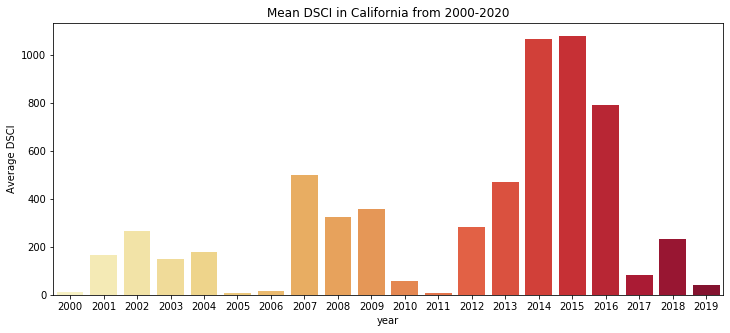

In [12]:
# Bar Chart of Mean DSCI
plt.figure(figsize=(12,5))
plt.title("Mean DSCI in California from 2000-2020")
pal = sns.color_palette("YlOrRd",20)
ax = sns.barplot(x='year', y='Average DSCI', data=year_df, palette=pal)
plt.savefig("Images/MeanDSCIBarGraph.png")

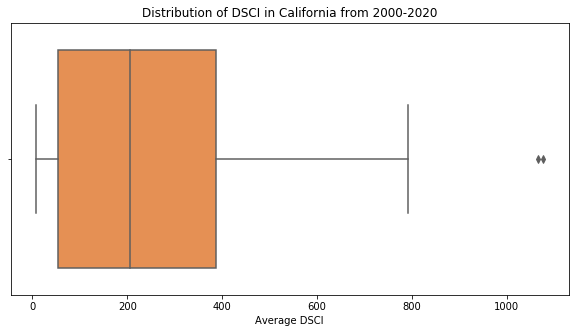

In [13]:
plt.figure(figsize=(10,5))
plt.title("Distribution of DSCI in California from 2000-2020")
ax = sns.boxplot(x=year_df["Average DSCI"],palette="Oranges")
plt.savefig("Images/AverageDSCIBoxPlot.png")

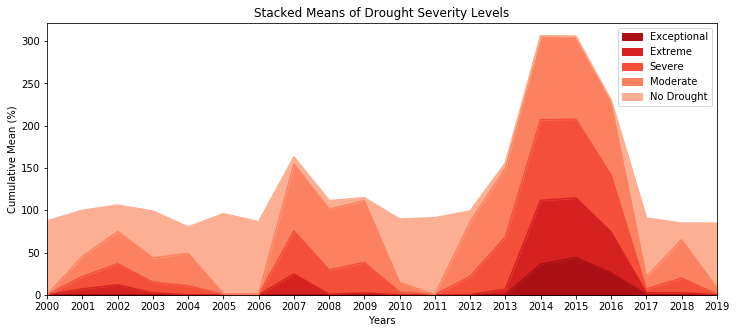

In [8]:
#left out abnormally dry as it's a total of d1-d4, and this is an area graph of the means of
#the severity levels
droughtGroupYear = droughtData.groupby(droughtData["year"])
exceptionalMean = droughtGroupYear["D4-Exceptional Drought"].mean()
extremeMean = droughtGroupYear["D3-Extreme Drought"].mean()
severeMean = droughtGroupYear["D2-Severe Drought"].mean()
moderateMean = droughtGroupYear["D1-Moderate Drought"].mean()
noDroughtMean = droughtGroupYear["No Drought"].mean()

droughtLevelMeansDFNoAb = pd.DataFrame({"Exceptional": exceptionalMean, "Extreme":extremeMean, "Severe":severeMean,
                   "Moderate":moderateMean, "No Drought": noDroughtMean})

pal = reversed(sns.color_palette("Reds"))
droughtLevelMeansDFNoAb.plot.area(color=pal, figsize=(12,5))

plt.gca().set_xticks(droughtData["year"].unique()) #gets rid of year being converted to float
plt.title("Stacked Means of Drought Severity Levels")
plt.xlabel("Years")
plt.ylabel("Cumulative Mean (%)")
plt.savefig("Images/CumulativeMeanDSCIAreaChart.png")
plt.show()

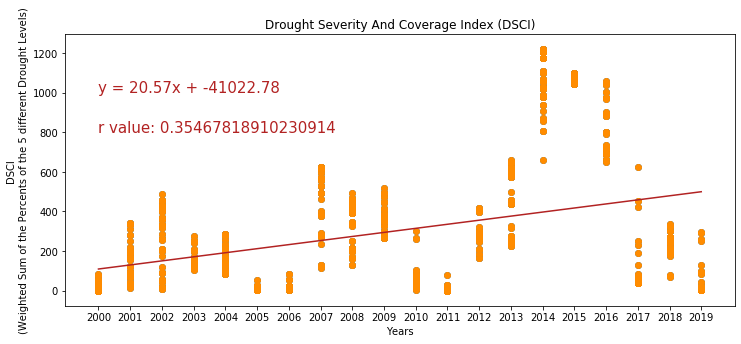

In [9]:
#linear regression of dsci over the years
xValues = droughtData["year"]
yValues = droughtData["DSCI"]
plt.figure(figsize=(12,5))
plt.scatter(x = droughtData["year"], y = droughtData["DSCI"])
plt.gca().set_xticks(droughtData["year"].unique())

(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regress_values = xValues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xValues,yValues, color="darkorange")
plt.plot(xValues,regress_values,"firebrick")
plt.annotate(line_eq,(2000,1000),fontsize=15,color="firebrick")
plt.annotate(f'r value: {rvalue}', (2000,800), fontsize=15, color="firebrick")
plt.title("Drought Severity And Coverage Index (DSCI)")
plt.xlabel("Years")
plt.ylabel("DSCI \n(Weighted Sum of the Percents of the 5 different Drought Levels)")
plt.savefig("Images/WeightedSumDSCIScatterPlot.png")
plt.show()

In [10]:
# T-Test for acres affected by All Drought Conditions versus acres burned in Wildfires

droughtData["D0 Percent"] = droughtData["D0-Abnormally Dry"]/100
CAacres= 104765000 #number of acres in California
droughtData["D0-Abnormally Dry Acres"] = CAacres * droughtData["D0 Percent"]

droughtDataTtestAll = droughtData["D0-Abnormally Dry Acres"]
fireDataTtest = fireData["Acres"]
stats.ttest_ind(droughtDataTtestAll, fireDataTtest)

Ttest_indResult(statistic=6.88358778689985, pvalue=9.964756708233066e-12)

In [11]:
# T-test for acres affected by Exceptional Droughts versus acres burned in Wildfires

droughtData["D4 Percent"] = droughtData["D4-Exceptional Drought"]/100
droughtData["D4-Exceptional Drought Acres"] = CAacres * droughtData["D4 Percent"]
droughtDataTtestExc = droughtData["D4-Exceptional Drought Acres"]
stats.ttest_ind(droughtDataTtestExc, fireDataTtest)

Ttest_indResult(statistic=1.5041971722460221, pvalue=0.13282792661725806)